## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#
var_list = ['year', 'wrkstat', 'prestige', 'rincome', 'hrs1', 'jobhrw', 'age', 'educ', 'major1', 'happy', 'health', 'life', 'richwork', 'mntlhlth'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

2. Write a short description of the data you chose, and why. 

'year', 'work status', 'commute time to work', 'occupational prestige score', 'income', 'hours worked last week', 'hours per week on work computer', 'government employee', 'age', 'education', 'college major', 'happy', 'health', 'life', 'if rich, continue or stop work', 'mental health' 

The variables I chose are mostly related to employment and life outcomes. Work-life balance is something brought up often, so I tried to choose variables where I could test and see if there is a relationship. I was curious what aspects of jobs, like hours worked or hours spent on a computer, affect the quality of life outside work. Some variables I chose that would represent the quality of life outside work include physical checks like happiness level, physical health, or mental health. But, I was also curious on how individuals would answer questions like, if you were rich, would you continue working? I think it depends on your income and satisfaction of your life so far, but to test this hypothesis, I would have to plot income and the richwork variable together. 

Since the dataset is a general social survey, there were so many variables to choose from, but the first variable that caught my eye was 'major1' which relates to college major. That was my starting point, as seeing that variable made me curious if there was a relationship between your college major and future endeavors in career, and furthermore happiness (which is how I got the idea for what variables to look for). Overall, I think it would be interesting to see how work and life intertwine, and specifically what factors of work affect the different aspects of a person's wellbeing and thoughts. 

In [206]:
# 3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

data = pd.read_csv('./selected_gss_data.csv')

# Rename some columns for easier understanding
data = data.rename(columns = {'hrs1': 'workinghours', 'wwwhrw': 'workcomputer_hrsweek', 'mntlhlth': 'mentalhealth_poor30' })

# print(data.isnull().sum())
# Drop NAs within work status because this variable is a base for answering other questions, don't want any missing values
data = data.dropna(subset=['wrkstat'])

# Make a new column with the happy variable as a numeric, so I can do a scatterplot later
data['happy'].value_counts()
happiness_map = {'not too happy': 1, 'happy': 2, 'pretty happy': 3, 'very happy': 4}
data['happy_num'] = data['happy'].map(happiness_map)

# Create a mapping of income categories to midpoints, so I have numbers to plot for income instead of categorical
income_mapping = {
    '$25,000 or more': 25000,
    '$20,000 to $24,999': 22500,
    '$15,000 to $19,999': 17500,
    '$10,000 to $14,999': 12500,
    '$8,000 to $9,999':  9000,
    '$7,000 to $7,999':  7500,
    '$6,000 to $6,999':  6500,
    '$5,000 to $5,999':  5500,
    '$4,000 to $4,999':  4500,
    '$3,000 to $3,999':  3500,
    '$1,000 to $2,999':  2000,
    'under $1,000':  500
}
data['rincome_num'] = data['rincome'].map(income_mapping)

# Create a subset of only those who would continue to work for later graph
data_ctw = data[data['richwork'] == 'continue to work']

data.head()

,year,wrkstat,prestige,rincome,workinghours,jobhrw,age,educ,major1,happy,health,life,richwork,mentalhealth_poor30,happy_num,rincome_num
0,1972,working full time,50.0,NaN,NaN,NaN,23.0,16.0,NaN,not too happy,good,NaN,NaN,NaN,1.0,NaN
1,1972,retired,45.0,NaN,NaN,NaN,70.0,10.0,NaN,not too happy,fair,NaN,NaN,NaN,1.0,NaN
2,1972,working part time,44.0,NaN,NaN,NaN,48.0,12.0,NaN,pretty happy,excellent,NaN,NaN,NaN,3.0,NaN
3,1972,working full time,57.0,NaN,NaN,NaN,27.0,17.0,NaN,not too happy,good,NaN,NaN,NaN,1.0,NaN
4,1972,keeping house,40.0,NaN,NaN,NaN,61.0,12.0,NaN,pretty happy,good,NaN,NaN,NaN,3.0,NaN


4. Produce some numeric summaries and visualizations. (1-3 pages)

happy      not too happy  pretty happy  very happy
health                                            
excellent       7.533875     46.808943   45.657182
fair           23.886480     57.508869   18.604651
good           12.054421     60.896535   27.049045
poor           38.776928     45.205003   16.018068


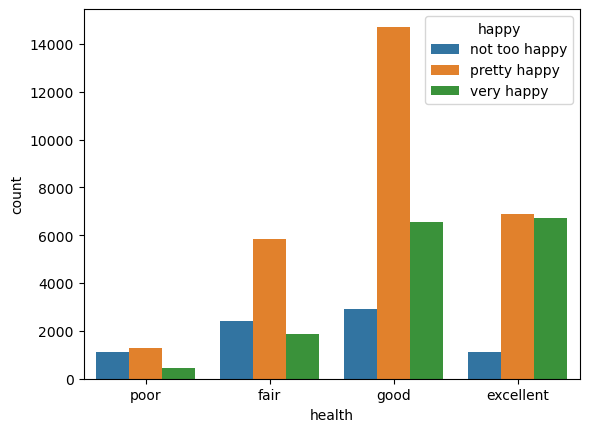

In [207]:
# Relationship between health and happiness

health_order = ["poor", "fair", "good", "excellent"]
sns.countplot(data=data, x="health", hue="happy", order=health_order)

cts = pd.crosstab(data['health'], data['happy'])
cts_percentage = cts.div(cts.sum(axis=1), axis=0) * 100
print(cts_percentage)


# It's interesting to see how the proportion of happiness levels change from poor to excellent health. Within those with poor health, more of them are not happy, 
# around 39% of the whole group. 

In [208]:
data.groupby('wrkstat')['mentalhealth_poor30'].mean()

wrkstat
in school                                                                      3.392857
keeping house                                                                  5.043860
other                                                                         11.088235
retired                                                                        3.257426
unemployed, laid off, looking for work                                         7.571429
with a job, but not at work because of temporary illness, vacation, strike     6.748792
working full time                                                              3.684543
working part time                                                              3.920844
Name: mentalhealth_poor30, dtype: float64

<Axes: title={'center': 'mentalhealth_poor30'}, ylabel='wrkstat'>

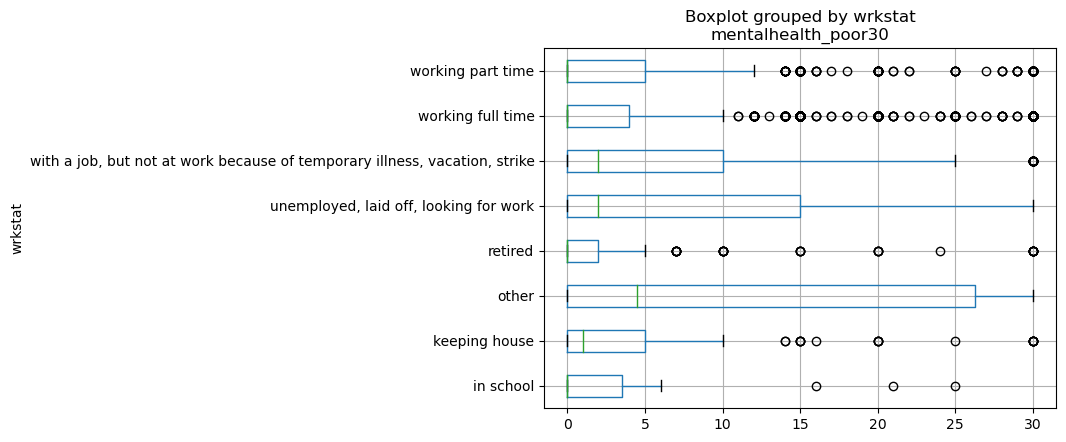

In [209]:
data2 = data[data['year'] >= 2010]
data2.boxplot(column='mentalhealth_poor30', by='wrkstat', vert=False)

/Users/jessicani/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='educ', ylabel='rincome_num'>

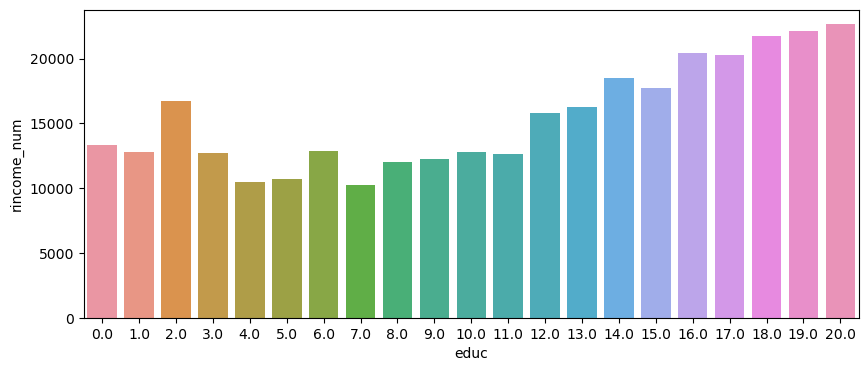

In [210]:
# Barplot of education and income

plt.figure(figsize=(10, 4))
sns.barplot(data=data, x="educ", y="rincome_num", estimator=np.mean)

# As education increases, the income tends to increase as well

Text(0.5, 1.0, 'Age Distribution of People Who Would Continue Working After Getting Rich')

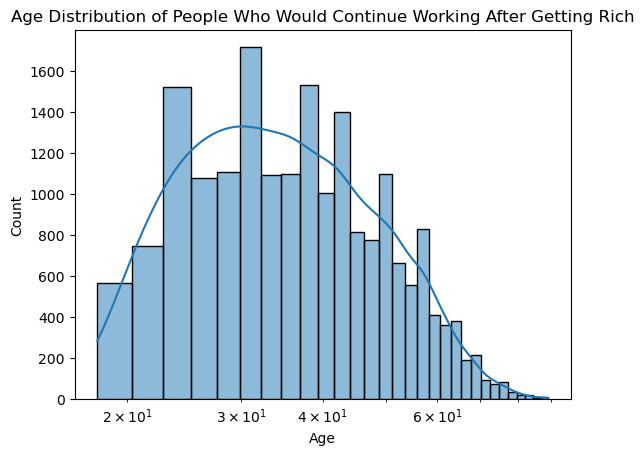

In [211]:
# Histogram and KDE of Ages who would continue to work after getting rich

sns.histplot(data=data_ctw, x="age", kde=True, bins=30)

# Use log scale on the x-axis
plt.xscale('log')

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of People Who Would Continue Working After Getting Rich")


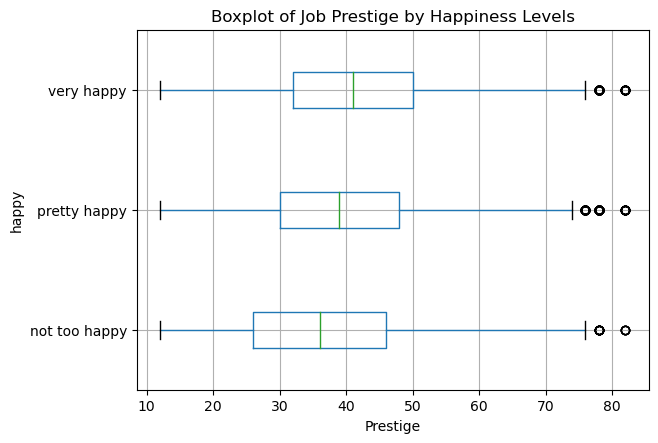

In [212]:
# Job Prestige and Happiness Level
data.boxplot(column='prestige', by='happy', vert=False)
plt.title('Boxplot of Job Prestige by Happiness Levels')
plt.suptitle('')
plt.xlabel('Prestige')
plt.show()
# Those with higher job prestige are on average happier

<Axes: title={'center': 'prestige'}, ylabel='rincome_num'>

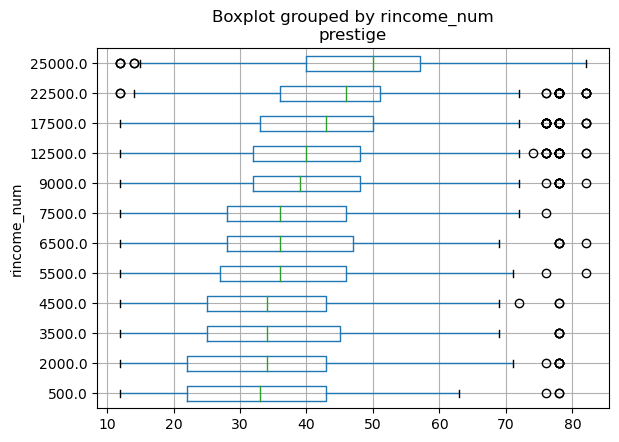

In [213]:
data.boxplot(column='prestige', by='rincome_num', vert=False)

Text(0.5, 0, 'Prestige')

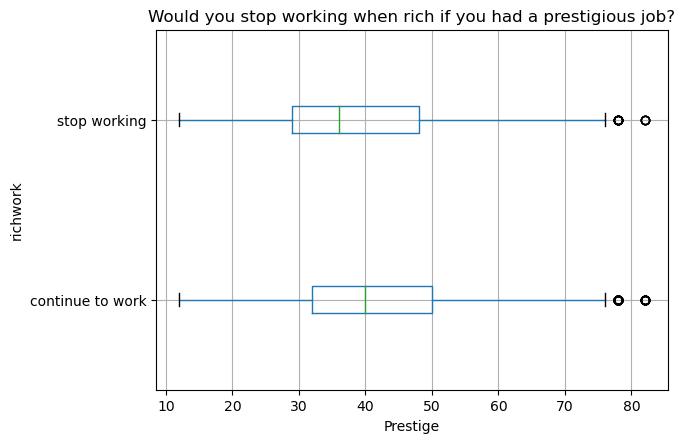

In [214]:
# Job Prestige and work when rich
data.boxplot(column='prestige', by='richwork', vert=False)
plt.title('Would you stop working when rich if you had a prestigious job?')
plt.suptitle('')
plt.xlabel('Prestige')

# Those with more prestigious jobs are more likely to continue working when rich, even though they make more income (from previous graph).

In [216]:
# Happiness levels within different College Majors
cts = pd.crosstab(data['major1'], data['happy'])
cts['proportion_not_happy'] = cts['not too happy'] / cts.sum(axis=1) # find the proportions of those 'not too happy' respective to their majors
sorted_cts = cts.sort_values(by='proportion_not_happy', ascending=False) # sort by the highest proportion of 'not too happy'
print(sorted_cts)

happy             not too happy  pretty happy  very happy  \
major1                                                      
philosophy                    7             6           3   
ethnic studies                2             3           0   
fashion                       4             6           2   
other vocational             12            15           9   
television/film               6            10           3   
...                         ...           ...         ...   
textiles/cloth                0             6           3   
humanities                    0             4           3   
gerontology                   0             3           2   
geology                       0            13           5   
forestry                      0             2           3   

happy             proportion_not_happy  
major1                                  
philosophy                    0.437500  
ethnic studies                0.400000  
fashion                       0.333333  
o

In [217]:
cts = pd.crosstab(data['major1'], data['happy'])
cts['proportion_very_happy'] = cts['very happy'] / cts.sum(axis=1) # find the proportions of those 'very happy' respective to their majors
sorted_cts2 = cts.sort_values(by='proportion_very_happy', ascending=False) # sort by the highest proportion of 'very happy'
print(sorted_cts2)

happy                         not too happy  pretty happy  very happy  \
major1                                                                  
forestry                                  0             2           3   
dentistry                                 3             8          14   
advertising                               2             2           4   
public relations                          1             4           5   
parks and recreation                      1             2           3   
...                                     ...           ...         ...   
criminology/criminal justice             29            98          23   
library science                           6            19           4   
mechanics/machine trade                   4            18           2   
ethnic studies                            2             3           0   
optometry                                 1             4           0   

happy                         proportion_very_happ

<Axes: xlabel='major1', ylabel='count'>

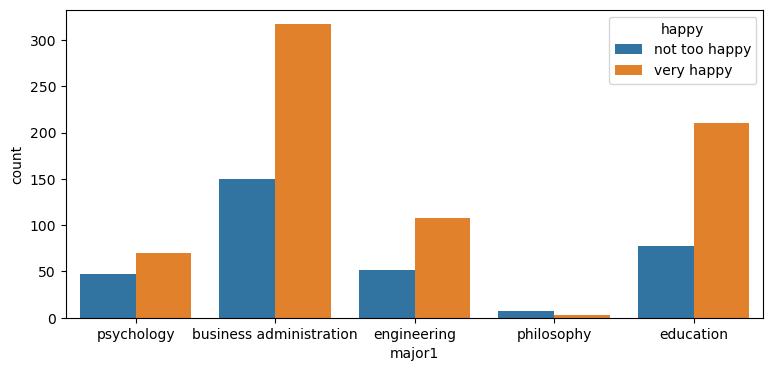

In [218]:
# Happiness levels within different college majors, are philosophy majors unhappy?
filtered_data = data[data['happy'].isin(['not too happy', 'very happy']) & data['major1'].isin(['business administration', 'education', 'engineering', 'psychology', 'philosophy'])]

plt.figure(figsize=(9,4))
sns.countplot(data=filtered_data, x="major1", hue="happy")


1. Describe your findings.

Relationship between health, mental health, and happiness

Overall, from a scale from poor, fair, good, and excellent, most people fall in the good health category and the least people fall in the poor health category. Within the poor health group, almost 40% of them are not too happy. We can compare this to those with excellent health, where 46% of them are very happy. Additionally, as people get healthier the overall proportion of unhappiness decreases and proportion of happiness levels increase. 

To continue on the idea of health, I created a boxplot to show the relationship between mental health and work status. Those who are retired have the lowest days of poor mental health within the last 30 days. Those who are unemployed displayed the highest amount of poor mental health within the last 30 days. It was also interesting to see that those in school have less poor mental health than those with a full time job.

Education and Income

As education increases, the average income also increases. Those with the lowest income tend to be within the 4 to 7 years of education range. This makes me question why those with even 0 to 3 years of education make more income on average.

If you were to get enough money to live as comfortably as you would like for the rest of your life, would you continue to work or would you stop working? 

According to the kernel density plot and histogram I created, older individuals are more likely to stop working if they had enough money to live comfortable. This makes sense as younger individuals tend to me more focused on their careers, and older individuals approach retirement. With a boxplot, it is shown that individuals with higher job prestige tend to make more income. But, something I found interesting was that those with more prestigious jobs would more rather continue to work after getting enough money to live comfortably, compared to those with lower prestige.

To continue with the idea of job prestige, those with higher prestige are on average happier than those with lower prestige.

College Major and Happiness

The last relationship I was interested in was college major and happiness. After making a cross table of college majors and happiness, I sorted by those with the highest proportion of being not happy. It was interesting to see that the proportion of philosophy majors that were not happy is 44%. Vice versa, after sorting for the highest proportion of those who are very happy, I saw that within forestry majors, 60% of them are very happy, and 56% with dentistry. 
